# Библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.gridspec import GridSpec
import random
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Функции приспособленности

coef = {
    'vita': (1.1, 2, -0.1), # наклон на линейном участке, степень нанелинейном участке, горизонтальное смещение на нелинейном участке    
}
name = 'vita'
delta = 0.0000001

a = lambda value: coef[name][0] / (value + delta) - 1
b = lambda value: value ** coef[name][1] - coef[name][2] - 1
v = 1
a(v) - b(v)

In [84]:
%matplotlib tk

In [129]:
def draw_function():
    i = 400
    fig = plt.figure(figsize=(10, 6))
    gs = GridSpec(ncols=1, nrows=1, figure=fig)
    X = np.linspace(0, 4, i)
    y = np.empty((5, i))
    names = ('vita', 'kpfc', 'mass', 'min_max')
    # names = ('mass', )
    
    for i, name in enumerate(names):
        function = get_function(name)
        for count, value in enumerate(X):
            key = get_key(value)
            y[i, count] = function[key](value)

    ax1 = plt.subplot(gs[0, 0])
    ax1.set(ylim=(-1, 15))   
    metr = ('s', '>', '1', 'o', '^')  
    for i in range(len(names)):
        ax1.plot(X, y[i])#marker=metr[i])
    ax1.legend(names)
    ax1.grid()

draw_function() 

In [158]:
def get_function(name):
    coef = { # кря, методом подбора ищи коэффициенты, я подбирал что бы левая и правая часть сходились в 1 и значение было равно 0
        'vita': (0.5, 4, 0.1), # наклон на линейном участке, степень нанелинейном участке, горизонтальное смещение на нелинейном участке 
        'kpfc': (40, 2, -0.9),
        'mass': (20, 1.5, 0.1, 7),
        'min_max':(18, 7, 0.1)
    }
    delta = 0.0000001
    match name: # потенциально можно сделать свою функцию длякаждогокомпанента
        case 'vita':
            return {
                 0: lambda value: coef[name][0] / (value + delta) - coef[name][0] + 0.1,
                 1: lambda value: value ** coef[name][1] + coef[name][2] - 1,
                 2: lambda value: 0
            }
        case 'kpfc':
            return {
                 0: lambda value: coef[name][0] / (value + delta) - coef[name][0] + 0.1,
                 1: lambda value: value ** coef[name][1] + coef[name][2],
                 2: lambda value: 0
            }
        case 'mass':
            return {
                 0: lambda value: coef[name][0] / (value + delta) - coef[name][0] + 0.1,
                 1: lambda value: (value) ** coef[name][1] + coef[name][2] - 1,
                 2: lambda value: 0
            }
        case 'min_max':
            return {
                 0: lambda value: coef[name][0] / (value + delta) - coef[name][0] + 0.1,
                 1: lambda value: value ** coef[name][1] + coef[name][2] - 1,
                 2: lambda value: 0
            }
    raise NameError(f'Not name {name}')




# Обработка данных

In [4]:
def get_min_max(name_column):
    global normal
    # возвражает граничные значения нормы по нужному параметру
    return normal.loc[0, name_column], normal.loc[1, name_column]

def normalize_value(value, value_min, value_max):
    # сколько дельт мы откладываем от минимума
    # допустим, 5 при границах 15, 20 -> -2 при границах 0, 1

    value_mean = (value_min + value_max) / 2
    return value / value_mean


def normalize_data(df_vegetable):
    normalize_data_df = df_vegetable.copy()

    for name in normalize_data_df.columns[4:]:
        value_min, value_max = get_min_max(name)
        
        for i in range(len(normalize_data_df.loc[:, name])):
            normalize_data_df.loc[i, name] = normalize_value(normalize_data_df.loc[i, name], value_min, value_max)    
    return normalize_data_df 

In [5]:
# загружаем данные

path_to_file = r'C:\Users\user\Desktop\8 семестр\Биологические СОЖ Зч'
name_file = 'veget_list2.csv'
name_file = 'Растения.xlsx'

vegetable_main_df = pd.read_excel(os.path.join(path_to_file, name_file))

normal = vegetable_main_df.loc[0:1]
normal.dropna(axis=1, inplace=True)

dimension = vegetable_main_df.iloc[2]
vegetable_main_df.drop([2], axis=0, inplace=True)
vegetable_main_df.drop([0, 1], axis=0, inplace=True)
vegetable_main_df.reset_index(drop=True, inplace=True)

harvest = pd.DataFrame()
harvest['type'] = vegetable_main_df.type
harvest['урожайность'] = vegetable_main_df.loc[:,  'Урожайность'] / vegetable_main_df.loc[:, 'time'] * 4.5

vegetable_main_df.drop(['Урожайность', 'time'], axis=1, inplace=True)

# нормализация значений из таблицы
normalize_vegetable_main_df = normalize_data(vegetable_main_df)

vegetable_main_df

# на выходе этой ячейки должны получиться два массива
# normal - две строки где прописаны нормы
# normalize_vegetable_main_df - прописаны нормализованные значения для растений
# 


C:\Users\user\AppData\Local\Temp\ipykernel_15732\2756362000.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal.dropna(axis=1, inplace=True)


,type,processing,min,max,calories,protein,fats,carbohydrater,A,B1,C
0,карликовая пшеница,Карликовая пшеница,1.4,2,3050,118,22,595,20,4.4,0
1,морковь,Морковь,0.62,1,410,9.3,2.4,95.8,20000,0.6,50
2,редис,редис,0.4,1.2,160,6.8,1,34,0,0.1,250
3,свекла,свекла,0.2,1,430,16,2,96,20,0.2,100
4,картофель,картофель,0.8,1.2,770,20.5,0.9,174.9,30,1.2,200
5,капуста,капуста,0.6,2,320,30.2,6.1,54.2,30,0.3,600
6,огурцы,огурцы,0.8,2.8,150,6.5,1.1,36.3,100,0.3,0
7,щавель,щавель,0,0.6,220,20,7,32,2000,0.4,480
8,салат,салат,0.4,0.6,120,13,2,28,2920,0.3,1.5
9,укроп,укроп,0,0.6,380,25,5,63,3860,0.58,850


In [6]:
normal

,type,processing,min,max,calories,protein,fats,carbohydrater,A,B1,C
0,норма,норма_мин,10,10,14000,361.666667,280,1750,6000,9,2600
1,норма,норма_макс,14,14,21000,431.666667,420,2100,6300,9.5,2800


In [7]:
dimension

type                  размерность
processing       На 1 кг продукта
Урожайность              кг с м^2
time                        сутки
min                            Кг
max                            Кг
calories                     Ккал
protein                         г
fats                            г
carbohydrater                   г
A                             мкг
B1                             мг
C                             мкг
Name: 2, dtype: object

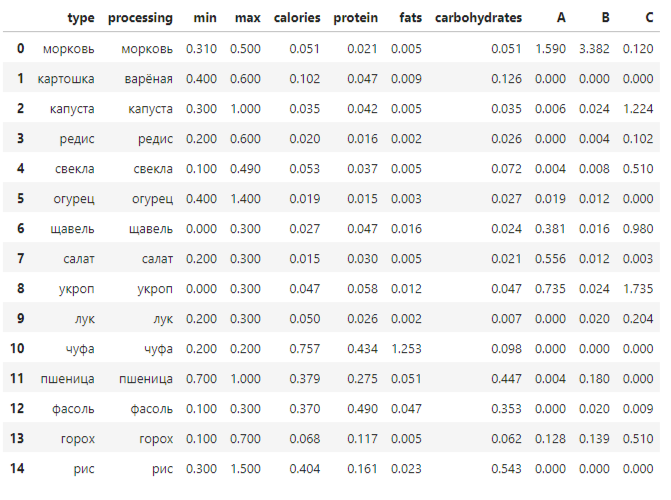

# Генетический алгоритм

## Вручную

In [8]:
class FitnessMax():
    def __init__(self):
        self.values = [0]


class Individual(list): # наследуемся от списка
    def __init__(self, *args):
        super().__init__(*args)
        self.fitness= FitnessMax()

## Функция потерь

In [155]:
def get_key_mass(value):
    normal_value = mass_normal
    if value > normal_value[0] and value < normal_value[1]:
        return 2, value
    if value <= normal_value[0]:
        return 0, value
    if value >= normal_value[1]:
        return 1, value

def get_key_vita(value, index):
    normal_value = vita_normal[index]
    if value > normal_value[0] and value < normal_value[1]:
        return 2, value
    if value <= normal_value[0]:
        return 0, value
    if value >= normal_value[1]:
        return 1, value


def get_key_kpfc(value, index):
    normal_value = kpfc_normal[index]
    if value > normal_value[0] and value < normal_value[1]:
        return 2, value
    if value <= normal_value[0]:
        return 0, value 
    if value >= normal_value[1]:
        return 1, value
        
def get_key_min_max(value, index):
    normal_value = min_max_normal[index]
    normalize_val = normal_value.sum() / 2
    if value > normal_value[0] and value < normal_value[1]:
        return 2, value
    if value <= normal_value[0]:
        return 0, value / normalize_val
    if value >= normal_value[1]:
        return 1, value / normalize_val


def get_score_kpfc(nums):
    fit = 0
    functions = get_function('kpfc')
    for index, num in enumerate(nums):
        key, normalize_num = get_key_kpfc(num, index)
        function = functions[key]
        fit += float(function(normalize_num))
    return fit

def get_score_vita(nums):
    fit = 0
    functions = get_function('vita')
    for index, num in enumerate(nums):
        key, normalize_num = get_key_vita(num, index)
        function = functions[key]
        fit += float(function(normalize_num))
    return fit

def get_score_mass(num):
    fit = 0
    functions = get_function('mass')
    key, normalize_num = get_key_mass(num)
    function = functions[key]
    fit += float(function(normalize_num))
    return fit
    
def get_score_min_max(nums):
    fit = 0
    functions = get_function('min_max')
    for index, num in enumerate(nums):
        key, normalize_num = get_key_min_max(num, index)
        function = functions[key]
        fit += float(function(normalize_num))
    return fit


def oneMaxFitness(individual): # считаем насколько хорош список
    global kpfc_table, vita_table, min_max_normal, mass_normal, vita_normal, kpfc_normal, one_max_len, mass_table
    
    nums = np.array(individual).reshape(one_max_len, -1)
    fit = 0
    sum_kpfc = (kpfc_table * nums).sum(axis=0) # суммарный КБЖУ
    sum_vita = (vita_table * nums).sum(axis=0) # сумма по витаминам
    sum_mass = nums.sum() # суммарная масса всех растений

    fit += get_score_kpfc(sum_kpfc)
    fit += get_score_vita(sum_vita)
    fit += get_score_mass(sum_mass)
    fit += get_score_min_max(nums)
    return float(fit),


def individualCreator():
    return Individual([random.random() for _ in range(one_max_len)])#list(np.random.randint(0, 2, (one_max_len))))


def populationCreator(n = 0):
    return list([individualCreator() for _ in range(n)])

In [10]:
def clone(value):
    ind = Individual(value[:])
    ind.fitness.values[0] = value.fitness.values[0]
    return ind


def sel_tour(population, p_len):
    offspring = []
    for n in range(p_len):
        i1 = i2 = i3 = 0
        while i1 == i2 or i1 == i3 or i2 == i3:
            i1, i2, i3 = [random.randint(0, p_len - 1) for _ in range(3)]

        offspring.append(min([population[i1], population[i2], population[i3]] , key=lambda ind: ind.fitness.values[0]))
    return offspring


def cx_one_point(child1, child2):
    s = random.randint(2, len(child1) - 3)
    child1[s:], child2[s:] = child2[s:], child1[s:]


def mutation(mutant, indpb=0.01):
    global dispersia
    for indx in range(len(mutant)):
        if random.random() < indpb:
            num = random.triangular(0, 1, random.gauss(mutant[indx], dispersia))
            if num < 0: num = 0
            mutant[indx] = num

In [11]:
# алгоритм ГА

def cycle(one_max_len, population_size, p_crossover, p_mutation, max_generation):
    global dispersia
    population = populationCreator(n=population_size)

    generation_counter = 0
    
    fitness_values = []
    for individ in population:
        fitness_values.append(oneMaxFitness(individ))
    
    for individual, fitness_val in zip(population, fitness_values):
        individual.fitness.values = fitness_val
    
    max_val = []
    mean_val = []
    
    fitness_values = [individual.fitness.values[0] for individual in population]
    
    while  generation_counter < max_generation:
        generation_counter += 1
        offspring = sel_tour(population, len(population))
        offspring = list(map(clone, offspring))
    
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < p_crossover:
                cx_one_point(child1, child2)
    
        for mutant in offspring:
            if random.random() < p_mutation:
                mutation(mutant, indpb=1.0 / one_max_len)
    
        fresh_fit_val = []
        
        for individ in offspring:
            fresh_fit_val.append(oneMaxFitness(individ))
            
        for individual, fit_val in zip(offspring, fresh_fit_val):
            individual.fitness.values = fit_val
    
        population[:] = offspring
    
        fit_val = [ind.fitness.values[0] for ind in population]
        
        max_fit = min(fit_val)
        mean_fit = sum(fit_val) / len(fit_val)
        max_val.append(max_fit)
        mean_val.append(mean_fit)

        if generation_counter == 1 or generation_counter % 50 == 0:
            dispersia /= 2
            print(f'Поколение {generation_counter}, МП {round(max_fit, 3)}, СП {round(mean_fit, 3)}')

    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(np.arange(0, max_generation), max_val)#, '-.g')
    return population

## Запуск цикла

In [152]:
mass_normal.shape

(2,)

In [160]:
# для подсчёта получаемых элементов
kpfc_table = np.array(normalize_vegetable_main_df.loc[:, 'calories':'carbohydrater'])
vita_table = np.array(normalize_vegetable_main_df.loc[:, 'A':])
min_max_normal = np.array(normalize_vegetable_main_df.loc[:, ['min', 'max']])

# Для нахождения ключей
mass_normal = np.array(normal.loc[:, 'max'] / normal.loc[:, 'max'].mean())
vita_normal = np.array(normal.loc[:, 'A':] / normal.loc[:, 'A':].mean()).T
kpfc_normal = np.array(normal.loc[:, 'calories':'carbohydrater'] / normal.loc[:, 'calories':'carbohydrater'].mean()).T


# константы
one_max_len = len(normalize_vegetable_main_df[0:]) # длина подлежай оптимизации строки

# константы генетического алгоритма
population_size = 200 # количество индивидуумов в популяции
p_crossover = 0.9 # вероятность скрещивания
p_mutation = 0.8 # вероятность мутации индивидуума
max_generation = 400 # максимальное число поколений
dispersia = 2

random_seed = 42
random.seed(random_seed)

population = cycle(one_max_len, population_size, p_crossover, p_mutation, max_generation)

Поколение 1, МП 599.898, СП 31018033.431
Поколение 50, МП 144.071, СП 11064030.001
Поколение 100, МП 141.947, СП 3624598.076
Поколение 150, МП 140.739, СП 923255.202
Поколение 200, МП 140.612, СП 3863.791
Поколение 250, МП 140.592, СП 3135.398
Поколение 300, МП 140.504, СП 8003.99
Поколение 350, МП 140.487, СП 25614.228
Поколение 400, МП 140.486, СП 16159.311


In [13]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Вывод данных

In [210]:
def sor(ind):
    return ind.fitness.values[0]

p = sorted(population, key=sor)

solve_GA = np.array(p[0])
solve = solve_GA
score = oneMaxFitness(p[0])[0]

print('Нутриенты')
result_normal = pd.concat([normal.loc[:, 'calories':], pd.DataFrame(itog).T])
result_normal.index = ['min', 'max', 'result']
print(result_normal)
print()
print()
print('Массы')
result_mass = vegetable_main_df.loc[:, 'min':'max']
result_mass.loc[:, 'result'] = solve
result_mass.index = vegetable_main_df.type
result_mass = result_mass.T
print(result_mass)
print(f'Суммарная масса = ', end='')
print(round(sum(result_mass.loc['result', :]), 3))
print()
print()
square = pd.DataFrame()
square['Растение'] = df_with_ma.loc[:, 'type']
square['square'] = df_with_ma.loc[:, 'mass'] / harvest['урожайность'] / 7
print('Площадь для каждого растения')
print(square.set_index('Растение').T)	
print('Суммарная площадь = ', end='')
print(round(square['square'].sum(), 3))
print()
print()
result_elements = vegetable_main_df.loc[:, 'calories':].mul(solve, axis=0)
result_elements.index = vegetable_main_df.type
print(result_elements)

Нутриенты
       calories protein    fats carbohydrater         A     B1        C
min       14000 361.667     280          1750      6000      9     2600
max       21000 431.667     420          2100      6300  9.500     2800
result 9059.316 361.677 164.336      1678.515 11156.849 11.098 2736.260


Массы
type   карликовая пшеница  морковь редис  свекла  картофель  капуста  огурцы  \
min                  1.400   0.620  0.400   0.200      0.800    0.600  0.800   
max                      2       1  1.200       1      1.200        2  2.800   
result               1.708   0.439  0.400   0.999      1.180    1.660  0.878   

type   щавель салат  укроп   лук   чуфа  
min         0  0.400      0 0.400     0  
max     0.600  0.600  0.600 0.600 0.200  
result  0.304  0.403  0.092 0.598 0.200  
Суммарная масса = 8.86


Площадь для каждого растения
Растение карликовая пшеница  морковь редис  свекла  картофель  капуста   \
square                 3.021   0.140  0.064   0.729      2.141    2.108   



C:\Users\user\AppData\Local\Temp\ipykernel_15732\3875687006.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_mass.loc[:, 'result'] = solve


## Вывод данных в эксельку

In [16]:
call, p, f, c, A, B, C = np.array(df_with_ma.loc[:, 'calories':].mul(solve, axis=0).sum()) * mean_nums
pfc = (p, f, c)
vita = [A, B, C]

# Графики

In [17]:
class Grafics():

    def __init__(self, normal):
        self.normal = normal
        self.grafics = []
        self.draw_kpfc()
        self.draw_1d()

    def __getitem__(self, item):
        return self.grafics[item]

    def __len__(self):
        return len(self.grafics)

    def get_min_max(self, name_column):
        # возвражает граничные значения нормы по нужному параметру
        return self.normal.loc[0, name_column], self.normal.loc[1, name_column]

    def draw_kpfc(self):
        # Рисует 3д график с xyz - бжу

        fig_3d = plt.figure()
        ax_3d = fig_3d.add_subplot(projection='3d')

        # получаем граничные значения бжу
        p_min, p_max = self.get_min_max('protein')
        f_min, f_max = self.get_min_max('fats')
        c_min, c_max = self.get_min_max('carbohydrates')

        # определяем последовательность построения допустимой зоны бжу
        protein = np.array([
            [p_min, p_min],
            [p_max, p_max],
            [p_max, p_max],
            [p_min, p_min],
            [p_min, p_min],
            [p_max, p_max],
            [p_max, p_max],
            [p_min, p_min],
            [p_min, p_min],
            [p_max, p_max]
        ])
        fat = np.array([
            [f_min, f_max],
            [f_min, f_max],
            [f_min, f_max],
            [f_min, f_max],
            [f_min, f_min],
            [f_min, f_min],
            [f_min, f_min],
            [f_min, f_min],
            [f_max, f_max],
            [f_max, f_max]
        ])
        carbon = np.array([
            [c_min, c_min],
            [c_min, c_min],
            [c_max, c_max],
            [c_max, c_max],
            [c_max, c_max],
            [c_max, c_max],
            [c_max, c_min],
            [c_max, c_min],
            [c_max, c_min],
            [c_max, c_min]
        ])

        ax_3d.plot_surface(protein, fat, carbon, color='green', alpha=0.2)

        ax_3d.set_xlabel('protein')
        ax_3d.set_ylabel('fat')
        ax_3d.set_zlabel('carbon')
        ax_3d.set_title('КБЖУ')
        self.grafics.append((fig_3d, ax_3d))

    def draw_1d(self):
        name_columns = self.normal.loc[:, 'A':].columns
        for name in name_columns:
            fig, ax = plt.subplots(1, 1, figsize=(10, 0.4))

            param_min, param_max = self.get_min_max(name)
            ax.hlines(0, 0.9 * param_min, 1.1 * param_max)  # Draw a horizontal line
            ax.scatter((param_min, param_max), (0, 0), color='black')
            ax.axis('off')
            ax.text(0.9 * param_min, 0, name)
            ax.text(param_min, 0, 'min ' + str(param_min))
            ax.text(param_max, 0, 'max ' + str(param_max))
            self.grafics.append((fig, ax))

    def draw_result_kpfc(self, pfc, kcal):
        # рисует точку на графике КБЖУ и определяет её цвет (плохо определяет)
        fig, ax_3d = self.grafics[0]
        kcal_min, kcal_max = tuple(np.array(self.get_min_max('calories')))
        ax_3d.scatter(*pfc, color=self.get_color(kcal, kcal_min, kcal_max))
        ax_3d.text(*pfc, round(kcal, 2))

    def draw_result_1d(self, params):
        # Наносит точки получившегося решения на оси витамин и микроэлементов

        for figure, param, name in zip(self.grafics[1:], params, self.normal.loc[:, 'A':].columns):
            ax = figure[1]
            param_min, param_max = tuple(np.array(self.get_min_max(name)))

            if param > param_max:
                ax.hlines(0, 1.1 * param_max, param)
            elif param < param_min:
                ax.hlines(0, param, 0.9 * param_min)
            ax.scatter(param, 0, c=self.get_color(param, param_min, param_max))
            ax.text(param, 0, param)

    def get_color(self, num, num_min, num_max):
        # возвращает цвет для точки
        if num > num_max:
            return (1, 0, 0)
        elif num < num_min:
            return (0, 0, 1)

        num_mean = (num_min + num_max) / 2
        normalize = lambda num_min, num, num_max: (num - num_min) / (num_max - num_min)
        n = normalize(num_min, num, num_max)

        if num <= num_mean:
            return (0, 1 - n, n)
        elif num > num_mean:
            return (n, 1 - n, 0)







# Линейное программирование

In [19]:
from scipy.optimize import linprog

In [35]:
# недостаток/избыток
# кбжу, витамины, масса
# почему такая дичь и запара https://proglib.io/p/lineynoe-programmirovanie-praktika-resheniya-zadach-optimizacii-na-python-2020-11-26

plants, _ = normalize_vegetable_main_df.loc[:, 'min':].shape

# минимизация
koefs = np.array([-1] * plants)

lhs_ineq_nutr_less = np.array(vegetable_main_df.loc[:, 'calories':]).T
lhs_ineq_nutr_more = lhs_ineq_nutr_less * -1

lhs_ineq_sum_mass_less = np.array([1] * plants).reshape(-1, plants)
lhs_ineq_sum_mass_more = lhs_ineq_sum_mass_less * -1

lhs_ineq_mass_everyone_less = np.zeros([plants, plants])
for i in range(plants):
    lhs_ineq_mass_everyone_less[i, i] = 1

lhs_ineq_mass_everyone_more = lhs_ineq_mass_everyone_less * -1

sistem_left = np.vstack([lhs_ineq_sum_mass_less, lhs_ineq_sum_mass_more, lhs_ineq_mass_everyone_less, lhs_ineq_mass_everyone_more, lhs_ineq_nutr_less, lhs_ineq_nutr_more])



rhs_ineq_nutr_less = np.array(normal.loc[1, 'calories':]).reshape(-1, 1)
rhs_ineq_nutr_more = np.array(normal.loc[0, 'calories':]).reshape(-1, 1)
rhs_ineq_sum_mass_less = np.array(normal.loc[1, 'max']).reshape(-1, 1)
rhs_ineq_sum_mass_more = np.array(normal.loc[0, 'max']).reshape(-1, 1)
rhs_ineq_mass_everyone_less = np.array(vegetable_main_df.loc[:, 'max']).reshape(-1, 1)
rhs_ineq_mass_everyone_more = np.array(vegetable_main_df.loc[:, 'min']).reshape(-1, 1)

sistem_right = np.vstack([rhs_ineq_sum_mass_less, rhs_ineq_sum_mass_more, rhs_ineq_mass_everyone_less, rhs_ineq_mass_everyone_more, rhs_ineq_nutr_less, rhs_ineq_nutr_more]).reshape(-1)



## Все неравенства

In [123]:
# недостаток/избыток
# кбжу, витамины, масса
# почему такая дичь и запара https://proglib.io/p/lineynoe-programmirovanie-praktika-resheniya-zadach-optimizacii-na-python-2020-11-26
vivod_sistem = 0 # печатать или нет матрицу А и вектор В

plants, _ = normalize_vegetable_main_df.loc[:, 'min':].shape

# минимизация
koefs = np.array([-1] * plants)

lhs_ineq_nutr_less = np.array(vegetable_main_df.loc[:, 'calories':]).T
lhs_ineq_nutr_more = lhs_ineq_nutr_less * -1

lhs_ineq_sum_mass_less = np.array([1] * plants).reshape(-1, plants)
lhs_ineq_sum_mass_more = lhs_ineq_sum_mass_less * -1

lhs_ineq_mass_everyone_less = np.zeros([plants, plants])
for i in range(plants):
    lhs_ineq_mass_everyone_less[i, i] = 1

lhs_ineq_mass_everyone_more = lhs_ineq_mass_everyone_less * -1

sistem_left = np.vstack([lhs_ineq_sum_mass_less, lhs_ineq_sum_mass_more, lhs_ineq_mass_everyone_less, lhs_ineq_mass_everyone_more, lhs_ineq_nutr_less, lhs_ineq_nutr_more])



rhs_ineq_nutr_less = np.array(normal.loc[1, 'calories':]).reshape(-1, 1)
rhs_ineq_nutr_more = np.array(normal.loc[0, 'calories':]).reshape(-1, 1) * -1
rhs_ineq_sum_mass_less = np.array(normal.loc[1, 'max']).reshape(-1, 1)
rhs_ineq_sum_mass_more = np.array(normal.loc[0, 'max']).reshape(-1, 1) *-1
rhs_ineq_mass_everyone_less = np.array(vegetable_main_df.loc[:, 'max']).reshape(-1, 1)
rhs_ineq_mass_everyone_more = np.array(vegetable_main_df.loc[:, 'min']).reshape(-1, 1) *-1

sistem_right = np.vstack([rhs_ineq_sum_mass_less, rhs_ineq_sum_mass_more, rhs_ineq_mass_everyone_less, rhs_ineq_mass_everyone_more, rhs_ineq_nutr_less, rhs_ineq_nutr_more]).reshape(-1)

if vivod_sistem:
    print(sistem_left)
    print()
    print(sistem_right)

opt = linprog(c=koefs, A_ub=sistem_left, b_ub=sistem_right,
              method="highs")

x = opt['x']
solve = x
print(opt)
print()
print(solve)

       message: The problem is infeasible. (HiGHS Status 8: model_status is Infeasible; primal_status is At lower/fixed bound)
       success: False
        status: 2
           fun: None
             x: None
           nit: 0
         lower:  residual: None
                marginals: None
         upper:  residual: None
                marginals: None
         eqlin:  residual: None
                marginals: None
       ineqlin:  residual: None
                marginals: None

None


## Неравенства больше или равно

In [124]:
# недостаток/избыток
# кбжу, витамины, масса
# почему такая дичь и запара https://proglib.io/p/lineynoe-programmirovanie-praktika-resheniya-zadach-optimizacii-na-python-2020-11-26
vivod_sistem = 0 # печатать или нет матрицу А и вектор В

plants, _ = normalize_vegetable_main_df.loc[:, 'min':].shape

# минимизация
koefs = np.array([-1] * plants)

lhs_ineq_nutr_less = np.array(vegetable_main_df.loc[:, 'calories':]).T
lhs_ineq_nutr_more = lhs_ineq_nutr_less * -1

lhs_ineq_sum_mass_less = np.array([1] * plants).reshape(-1, plants)
lhs_ineq_sum_mass_more = lhs_ineq_sum_mass_less * -1

lhs_ineq_mass_everyone_less = np.zeros([plants, plants])
for i in range(plants):
    lhs_ineq_mass_everyone_less[i, i] = 1

lhs_ineq_mass_everyone_more = lhs_ineq_mass_everyone_less * -1

sistem_left = np.vstack([lhs_ineq_sum_mass_less, lhs_ineq_sum_mass_more, lhs_ineq_mass_everyone_less, lhs_ineq_mass_everyone_more, lhs_ineq_nutr_less, lhs_ineq_nutr_more])



rhs_ineq_nutr_less = np.array(normal.loc[1, 'calories':]).reshape(-1, 1) * -1
rhs_ineq_nutr_more = np.array(normal.loc[0, 'calories':]).reshape(-1, 1) * -1
rhs_ineq_sum_mass_less = np.array(normal.loc[1, 'max']).reshape(-1, 1) * -1
rhs_ineq_sum_mass_more = np.array(normal.loc[0, 'max']).reshape(-1, 1) * -1
rhs_ineq_mass_everyone_less = np.array(vegetable_main_df.loc[:, 'max']).reshape(-1, 1) * -1
rhs_ineq_mass_everyone_more = np.array(vegetable_main_df.loc[:, 'min']).reshape(-1, 1) * -1

sistem_right = np.vstack([rhs_ineq_sum_mass_less, rhs_ineq_sum_mass_more, rhs_ineq_mass_everyone_less, rhs_ineq_mass_everyone_more, rhs_ineq_nutr_less, rhs_ineq_nutr_more]).reshape(-1)

if vivod_sistem:
    print(sistem_left)
    print()
    print(sistem_right)

opt = linprog(c=koefs, A_ub=sistem_left, b_ub=sistem_right,
              method="highs")

x = opt['x']
solve = x
print(opt)
print()
print(solve)

       message: The problem is infeasible. (HiGHS Status 8: model_status is Infeasible; primal_status is At lower/fixed bound)
       success: False
        status: 2
           fun: None
             x: None
           nit: 0
         lower:  residual: None
                marginals: None
         upper:  residual: None
                marginals: None
         eqlin:  residual: None
                marginals: None
       ineqlin:  residual: None
                marginals: None

None


## Неравенства меньше или равно

In [215]:
# недостаток/избыток
# кбжу, витамины, масса
# почему такая дичь и запара https://proglib.io/p/lineynoe-programmirovanie-praktika-resheniya-zadach-optimizacii-na-python-2020-11-26
kpfc_koef = 1, 1
vita_koef = 1, 1
mass_koef = 1, 1

plants, _ = normalize_vegetable_main_df.loc[:, 'min':].shape

# минимизация
koefs = np.array([-1] * plants)

lhs_ineq_nutr_less = np.array(vegetable_main_df.loc[:, 'calories':]).T
lhs_ineq_nutr_more = lhs_ineq_nutr_less * -1

lhs_ineq_sum_mass_less = np.array([1] * plants).reshape(-1, plants)
lhs_ineq_sum_mass_more = lhs_ineq_sum_mass_less * -1

lhs_ineq_mass_everyone_less = np.zeros([plants, plants])
for i in range(plants):
    lhs_ineq_mass_everyone_less[i, i] = 1

lhs_ineq_mass_everyone_more = lhs_ineq_mass_everyone_less * -1

sistem_left = np.vstack([lhs_ineq_sum_mass_less, lhs_ineq_sum_mass_more, lhs_ineq_mass_everyone_less, lhs_ineq_mass_everyone_more, lhs_ineq_nutr_less, lhs_ineq_nutr_more])



rhs_ineq_nutr_less = np.array(normal.loc[1, 'calories':]).reshape(-1, 1)
rhs_ineq_nutr_more = np.array(normal.loc[0, 'calories':]).reshape(-1, 1)
rhs_ineq_sum_mass_less = np.array(normal.loc[1, 'max']).reshape(-1, 1)
rhs_ineq_sum_mass_more = np.array(normal.loc[0, 'max']).reshape(-1, 1)
rhs_ineq_mass_everyone_less = np.array(vegetable_main_df.loc[:, 'max']).reshape(-1, 1)
rhs_ineq_mass_everyone_more = np.array(vegetable_main_df.loc[:, 'min']).reshape(-1, 1)

sistem_right = np.vstack([rhs_ineq_sum_mass_less, rhs_ineq_sum_mass_more, rhs_ineq_mass_everyone_less, rhs_ineq_mass_everyone_more, rhs_ineq_nutr_less, rhs_ineq_nutr_more]).reshape(-1)

opt = linprog(c=koefs, A_ub=sistem_left, b_ub=sistem_right,
              method="highs")

x = opt['x']
solve = x
print(opt)
print()
print(solve)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -11.82848118565935
              x: [ 1.178e+00  3.062e-02  1.200e+00  1.000e+00  1.200e+00
                   2.000e+00  2.800e+00  6.000e-01  6.000e-01  6.000e-01
                   6.000e-01  1.991e-02]
            nit: 3
          lower:  residual: [ 1.178e+00  3.062e-02  1.200e+00  1.000e+00
                              1.200e+00  2.000e+00  2.800e+00  6.000e-01
                              6.000e-01  6.000e-01  6.000e-01  1.991e-02]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00  0.000e+00  0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf        inf        inf
                                    inf        inf        inf        inf
                                    inf        inf

In [216]:
print('Нутриенты')
result_normal = pd.concat([normal.loc[:, 'calories':], pd.DataFrame(itog).T])
result_normal.index = ['min', 'max', 'result']
print(result_normal)
print()
print()
print('Массы')
result_mass = vegetable_main_df.loc[:, 'min':'max']
result_mass.loc[:, 'result'] = solve
result_mass.index = vegetable_main_df.type
result_mass = result_mass.T
print(result_mass)
print(f'Суммарная масса = ', end='')
print(round(sum(result_mass.loc['result', :]), 3))
print()
print()
square = pd.DataFrame()
square['Растение'] = df_with_ma.loc[:, 'type']
square['square'] = df_with_ma.loc[:, 'mass'] / harvest['урожайность'] / 7
print('Площадь для каждого растения')
print(square.set_index('Растение').T)	
print('Суммарная площадь = ', end='')
print(round(square['square'].sum(), 3))
print()
print()
result_elements = vegetable_main_df.loc[:, 'calories':].mul(solve, axis=0)
result_elements.index = vegetable_main_df.type
print(result_elements)

Нутриенты
       calories protein    fats carbohydrater         A     B1        C
min       14000 361.667     280          1750      6000      9     2600
max       21000 431.667     420          2100      6300  9.500     2800
result 9059.316 361.677 164.336      1678.515 11156.849 11.098 2736.260


Массы
type   карликовая пшеница  морковь редис  свекла  картофель  капуста  огурцы  \
min                  1.400   0.620  0.400   0.200      0.800    0.600  0.800   
max                      2       1  1.200       1      1.200        2  2.800   
result               1.178   0.031  1.200   1.000      1.200    2.000  2.800   

type   щавель салат  укроп   лук   чуфа  
min         0  0.400      0 0.400     0  
max     0.600  0.600  0.600 0.600 0.200  
result  0.600  0.600  0.600 0.600 0.020  
Суммарная масса = 11.828


Площадь для каждого растения
Растение карликовая пшеница  морковь редис  свекла  картофель  капуста   \
square                 3.021   0.140  0.064   0.729      2.141    2.108   

C:\Users\user\AppData\Local\Temp\ipykernel_15732\3199384138.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_mass.loc[:, 'result'] = solve
